In [2]:
!pip install keras
!pip install tensorflow

In [3]:
#Data Handling and Manipulation
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  

#Statistical Analysis
from scipy import stats

#Plotting and Visualization
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 120


#Machine Learning
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras

In [4]:
data = pd.read_csv("../datagen/test.csv")
data.head()

,custid,Income,CreditScore,Debt,LoanTerm,InterestRate,CreditIncidents,HomeValue,LoanAmount,Lat,Long,MedianHomeValue,MedianHouseholdIncome,LoanStatus
0,2684,705885,625,642355.35,180,0.039,0,569560.0,284780.0,42.30865,-83.48216,196400,88853,Approved
1,7788,685386,793,41123.16,360,0.036,0,370620.0,296496.0,38.58894,-89.99038,127800,62201,Approved
2,23344,34309,755,5146.35,480,0.040,6,1013670.0,405468.0,34.09611,-118.10583,482700,47368,Rejected
3,26543,32826,666,14115.18,180,0.039,4,521760.0,104352.0,33.35283,-111.78903,217400,75365,Approved
4,27304,18685,638,11958.40,420,0.036,3,654670.0,196401.0,33.93113,-117.54866,385100,84905,Rejected


In [5]:
#Create features 
num_features = ['Income','CreditScore','Debt','LoanTerm','InterestRate','CreditIncidents','HomeValue','LoanAmount',
               'Lat','Long','MedianHomeValue','MedianHouseholdIncome']
df_features = data[num_features]
features = df_features.values
targets = np.argmax(pd.get_dummies(data.LoanStatus).values,axis=1)
print(targets)
# print(features.shape)

[0 0 1 ... 1 0 0]


In [6]:
#Scaling data 
scaler=MinMaxScaler()
X = scaler.fit_transform(features)

In [7]:
#Neural Network Model Creation

def create_model(input_shape):
    model = Sequential()
    model.add(Dense(128, input_dim=input_shape, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='sgd', metrics=['accuracy'])
    return model

In [8]:
#Training and evaluate Model 

def train_and_evaluate__model(model, data_train, labels_train, data_test, labels_test):
    history = model.fit(data_train,labels_train,validation_data=(data_test,labels_test),epochs=30,batch_size=128)
    val_acc = history.history['val_accuracy'][-1]  # change this line if running on windows to: val_acc = history.history['val_accuracy'][-1] 
    return val_acc, history

In [9]:
#K-Fold cross validation 

scores = []
models = []
historys = []
num_splits = 3
kf = KFold(n_splits=num_splits)
kf.get_n_splits(X)
input_shape = X.shape[1]
print(input_shape)

fold = 0
for train_index, test_index in kf.split(X):
    print("Running fold {}".format(fold))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = targets[train_index], targets[test_index]
    model = create_model(input_shape)
    score, history = train_and_evaluate__model(model,X_train,y_train,X_test,y_test)
    scores.append(score)
    models.append(model)
    historys.append(history)
    fold += 1
    
print('\n\nEstimated Accuracy ' , (np.round(np.mean(scores),2)))

12
Running fold 0
Epoch 1/30
108/108 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5373 - val_loss: 0.6831 - val_accuracy: 0.5987
Epoch 2/30
108/108 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.5995 - val_loss: 0.6690 - val_accuracy: 0.6918
Epoch 3/30
108/108 [==============================] - 0s 1ms/step - loss: 0.6658 - accuracy: 0.6793 - val_loss: 0.6468 - val_accuracy: 0.7464
Epoch 4/30
108/108 [==============================] - 0s 1ms/step - loss: 0.6426 - accuracy: 0.7263 - val_loss: 0.6160 - val_accuracy: 0.7852
Epoch 5/30
108/108 [==============================] - 0s 1ms/step - loss: 0.6070 - accuracy: 0.7583 - val_loss: 0.5698 - val_accuracy: 0.7945
Epoch 6/30
108/108 [==============================] - 0s 1ms/step - loss: 0.5582 - accuracy: 0.7797 - val_loss: 0.5097 - val_accuracy: 0.8091
Epoch 7/30
108/108 [==============================] - 0s 1ms/step - loss: 0.5021 - accuracy: 0.7882 - val_loss: 0.4492 - val_accur

108/108 [==============================] - 0s 994us/step - loss: 0.2518 - accuracy: 0.9005 - val_loss: 0.2366 - val_accuracy: 0.9121
Epoch 29/30
108/108 [==============================] - 0s 1ms/step - loss: 0.2485 - accuracy: 0.9012 - val_loss: 0.2337 - val_accuracy: 0.9101
Epoch 30/30
108/108 [==============================] - 0s 977us/step - loss: 0.2470 - accuracy: 0.9022 - val_loss: 0.2303 - val_accuracy: 0.9134
Running fold 2
Epoch 1/30
108/108 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5289 - val_loss: 0.6727 - val_accuracy: 0.5231
Epoch 2/30
108/108 [==============================] - 0s 970us/step - loss: 0.6608 - accuracy: 0.5365 - val_loss: 0.6444 - val_accuracy: 0.5634
Epoch 3/30
108/108 [==============================] - 0s 1ms/step - loss: 0.6344 - accuracy: 0.6295 - val_loss: 0.6149 - val_accuracy: 0.6741
Epoch 4/30
108/108 [==============================] - 0s 1ms/step - loss: 0.6029 - accuracy: 0.7052 - val_loss: 0.5815 - val_accuracy: 0

In [10]:
#model creation after K-Fold cross validation 
X_train, X_test, y_train, y_test = train_test_split(X, targets, test_size=0.20, random_state=42)
model = create_model(input_shape)
history = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=30,batch_size=128)

Epoch 1/30
129/129 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5268 - val_loss: 0.6852 - val_accuracy: 0.5275
Epoch 2/30
129/129 [==============================] - 0s 881us/step - loss: 0.6799 - accuracy: 0.5438 - val_loss: 0.6724 - val_accuracy: 0.5530
Epoch 3/30
129/129 [==============================] - 0s 843us/step - loss: 0.6638 - accuracy: 0.5772 - val_loss: 0.6503 - val_accuracy: 0.6173
Epoch 4/30
129/129 [==============================] - 0s 852us/step - loss: 0.6383 - accuracy: 0.6624 - val_loss: 0.6177 - val_accuracy: 0.7126
Epoch 5/30
129/129 [==============================] - 0s 882us/step - loss: 0.5989 - accuracy: 0.7326 - val_loss: 0.5709 - val_accuracy: 0.7468
Epoch 6/30
129/129 [==============================] - 0s 1ms/step - loss: 0.5415 - accuracy: 0.7782 - val_loss: 0.4983 - val_accuracy: 0.8125
Epoch 7/30
129/129 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.8063 - val_loss: 0.4395 - val_accuracy: 0.820

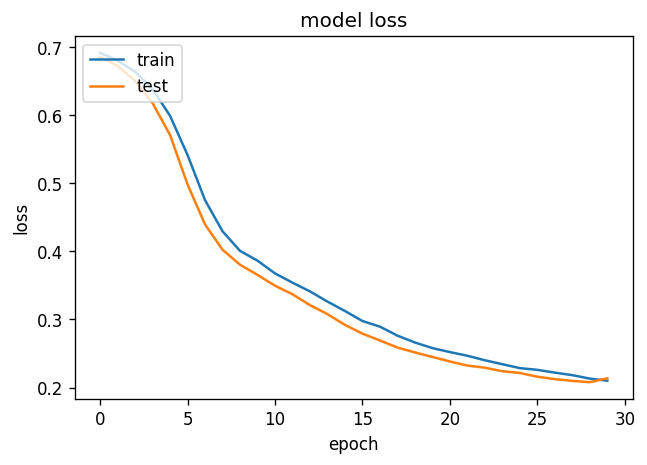

In [11]:
#model performance (loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();

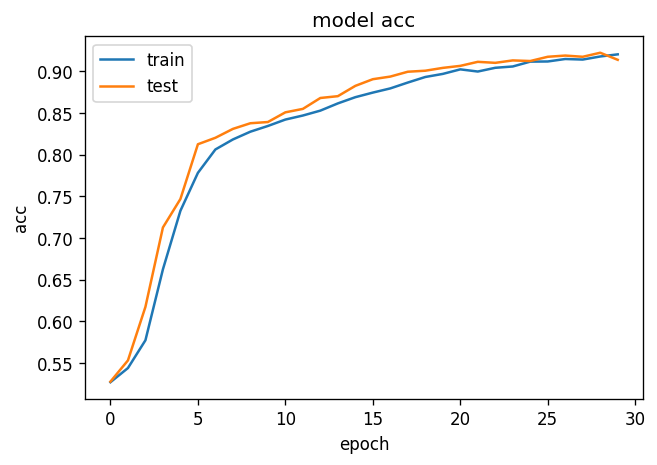

In [12]:
#model performance (accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();

In [14]:
# save the model
model.save('tempmodel.h5')